In [28]:
import boto3
import sagemaker
import os

region = boto3.Session().region_name
sage_client = boto3.Session().client('sagemaker')

tuning_job_name = 'xgboost-tuningjob-18-weight'


In [29]:
tuner_parent = sagemaker.HyperparameterTuningJobAnalytics(tuning_job_name)
tuner_parent.dataframe().sort_values(['FinalObjectiveValue'], ascending=False)


,FinalObjectiveValue,TrainingElapsedTimeSeconds,TrainingEndTime,TrainingJobName,TrainingJobStatus,TrainingStartTime,max_depth,num_round
14,0.121642,1130.0,2019-06-06 21:54:16-07:00,xgboost-tuningjob-18-weight-006-bf2721b1,Stopped,2019-06-06 21:35:26-07:00,5.0,954.0
13,0.119220,1319.0,2019-06-06 22:01:04-07:00,xgboost-tuningjob-18-weight-007-929d0dc8,Stopped,2019-06-06 21:39:05-07:00,4.0,820.0
7,0.118590,351.0,2019-06-06 22:08:11-07:00,xgboost-tuningjob-18-weight-013-cb2ceeed,Stopped,2019-06-06 22:02:20-07:00,9.0,491.0
19,0.113962,278.0,2019-06-06 21:36:43-07:00,xgboost-tuningjob-18-weight-001-865d80fa,Stopped,2019-06-06 21:32:05-07:00,10.0,770.0
16,0.113929,1564.0,2019-06-06 21:57:52-07:00,xgboost-tuningjob-18-weight-004-49e33447,Completed,2019-06-06 21:31:48-07:00,3.0,856.0
11,0.111283,234.0,2019-06-06 21:54:06-07:00,xgboost-tuningjob-18-weight-009-91b1b2fa,Completed,2019-06-06 21:50:12-07:00,2.0,140.0
8,0.108936,196.0,2019-06-06 22:03:53-07:00,xgboost-tuningjob-18-weight-012-09628a6c,Completed,2019-06-06 22:00:37-07:00,1.0,168.0
10,0.108928,185.0,2019-06-06 21:59:25-07:00,xgboost-tuningjob-18-weight-010-510f0e2a,Completed,2019-06-06 21:56:20-07:00,1.0,166.0
6,0.108704,226.0,2019-06-06 22:06:53-07:00,xgboost-tuningjob-18-weight-014-0fee4313,Completed,2019-06-06 22:03:07-07:00,1.0,215.0
9,0.108704,247.0,2019-06-06 22:00:41-07:00,xgboost-tuningjob-18-weight-011-c5a6af43,Stopped,2019-06-06 21:56:34-07:00,1.0,417.0


In [30]:
# run this cell to check current status of hyperparameter tuning job
tuning_job_result = sage_client.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)

status = tuning_job_result['HyperParameterTuningJobStatus']
if status != 'Completed':
    print('Reminder: the tuning job has not been completed.')
    
job_count = tuning_job_result['TrainingJobStatusCounters']['Completed']
print("%d training jobs have completed" % job_count)
    
is_minimize = (tuning_job_result['HyperParameterTuningJobConfig']['HyperParameterTuningJobObjective']['Type'] != 'Maximize')
objective_name = tuning_job_result['HyperParameterTuningJobConfig']['HyperParameterTuningJobObjective']['MetricName']
print(is_minimize, objective_name)

7 training jobs have completed
True validation:error


In [31]:
from pprint import pprint
if tuning_job_result.get('BestTrainingJob',None):
    print("Best model found so far:")
    pprint(tuning_job_result['BestTrainingJob'])
else:
    print("No training jobs have reported results yet.")


Best model found so far:
{'CreationTime': datetime.datetime(2019, 6, 6, 21, 29, 36, tzinfo=tzlocal()),
 'FinalHyperParameterTuningJobObjectiveMetric': {'MetricName': 'validation:error',
                                                 'Value': 0.0970269963145256},
 'ObjectiveStatus': 'Succeeded',
 'TrainingEndTime': datetime.datetime(2019, 6, 6, 21, 33, 22, tzinfo=tzlocal()),
 'TrainingJobArn': 'arn:aws:sagemaker:us-west-2:839183957519:training-job/xgboost-tuningjob-18-weight-002-86ff6ec9',
 'TrainingJobName': 'xgboost-tuningjob-18-weight-002-86ff6ec9',
 'TrainingJobStatus': 'Stopped',
 'TrainingStartTime': datetime.datetime(2019, 6, 6, 21, 31, 52, tzinfo=tzlocal()),
 'TunedHyperParameters': {'max_depth': '1', 'num_round': '752'}}


In [32]:
import pandas as pd

tuner = sagemaker.HyperparameterTuningJobAnalytics(tuning_job_name)

full_df = tuner.dataframe()

if len(full_df) > 0:
    df = full_df[full_df['FinalObjectiveValue'] > -float('inf')]
    if len(df) > 0:
        df = df.sort_values('FinalObjectiveValue', ascending=is_minimize)
        print("Number of training jobs with valid objective: %d" % len(df))
        print({"lowest":min(df['FinalObjectiveValue']),"highest": max(df['FinalObjectiveValue'])})
        pd.set_option('display.max_colwidth', -1)  # Don't truncate TrainingJobName        
    else:
        print("No training jobs have reported valid results yet.")
        
df


Number of training jobs with valid objective: 20
{'lowest': 0.0970269963145256, 'highest': 0.12164200097322464}


,FinalObjectiveValue,TrainingElapsedTimeSeconds,TrainingEndTime,TrainingJobName,TrainingJobStatus,TrainingStartTime,max_depth,num_round
18,0.097027,90.0,2019-06-06 21:33:22-07:00,xgboost-tuningjob-18-weight-002-86ff6ec9,Stopped,2019-06-06 21:31:52-07:00,1.0,752.0
17,0.097101,93.0,2019-06-06 21:33:22-07:00,xgboost-tuningjob-18-weight-003-24153436,Stopped,2019-06-06 21:31:49-07:00,1.0,170.0
0,0.108704,599.0,2019-06-06 22:23:05-07:00,xgboost-tuningjob-18-weight-020-bc92e8a5,Stopped,2019-06-06 22:13:06-07:00,1.0,948.0
15,0.108704,211.0,2019-06-06 21:39:12-07:00,xgboost-tuningjob-18-weight-005-a6ca4963,Stopped,2019-06-06 21:35:41-07:00,1.0,1000.0
12,0.108704,374.0,2019-06-06 21:47:58-07:00,xgboost-tuningjob-18-weight-008-270e0724,Stopped,2019-06-06 21:41:44-07:00,1.0,557.0
6,0.108704,226.0,2019-06-06 22:06:53-07:00,xgboost-tuningjob-18-weight-014-0fee4313,Completed,2019-06-06 22:03:07-07:00,1.0,215.0
9,0.108704,247.0,2019-06-06 22:00:41-07:00,xgboost-tuningjob-18-weight-011-c5a6af43,Stopped,2019-06-06 21:56:34-07:00,1.0,417.0
4,0.108704,236.0,2019-06-06 22:10:22-07:00,xgboost-tuningjob-18-weight-016-eb154c57,Completed,2019-06-06 22:06:26-07:00,1.0,236.0
3,0.108704,324.0,2019-06-06 22:14:30-07:00,xgboost-tuningjob-18-weight-017-0f4f4914,Stopped,2019-06-06 22:09:06-07:00,1.0,966.0
2,0.108704,333.0,2019-06-06 22:15:11-07:00,xgboost-tuningjob-18-weight-018-4f4efb28,Stopped,2019-06-06 22:09:38-07:00,1.0,907.0


In [33]:
import bokeh
import bokeh.io
bokeh.io.output_notebook()
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

class HoverHelper():

    def __init__(self, tuning_analytics):
        self.tuner = tuning_analytics

    def hovertool(self):
        tooltips = [
            ("FinalObjectiveValue", "@FinalObjectiveValue"),
            ("TrainingJobName", "@TrainingJobName"),
        ]
        for k in self.tuner.tuning_ranges.keys():
            tooltips.append( (k, "@{%s}" % k) )

        ht = HoverTool(tooltips=tooltips)
        return ht

    def tools(self, standard_tools='pan,crosshair,wheel_zoom,zoom_in,zoom_out,undo,reset'):
        return [self.hovertool(), standard_tools]

hover = HoverHelper(tuner)

p = figure(plot_width=900, plot_height=400, tools=hover.tools(), x_axis_type='datetime')
p.circle(source=df, x='TrainingStartTime', y='FinalObjectiveValue')
show(p)


Loading BokehJS ...

In [34]:
ranges = tuner.tuning_ranges
figures = []
for hp_name, hp_range in ranges.items():
    categorical_args = {}
    if hp_range.get('Values'):
        # This is marked as categorical.  Check if all options are actually numbers.
        def is_num(x):
            try:
                float(x)
                return 1
            except:
                return 0           
        vals = hp_range['Values']
        if sum([is_num(x) for x in vals]) == len(vals):
            # Bokeh has issues plotting a "categorical" range that's actually numeric, so plot as numeric
            print("Hyperparameter %s is tuned as categorical, but all values are numeric" % hp_name)
        else:
            # Set up extra options for plotting categoricals.  A bit tricky when they're actually numbers.
            categorical_args['x_range'] = vals

    # Now plot it
    p = figure(plot_width=500, plot_height=500, 
               title="Objective vs %s" % hp_name,
               tools=hover.tools(),
               x_axis_label=hp_name, y_axis_label=objective_name,
               **categorical_args)
    p.circle(source=df, x=hp_name, y='FinalObjectiveValue')
    figures.append(p)
show(bokeh.layouts.Column(*figures))

In [37]:
import pickle
import sklearn
import matplotlib
import xgboost as xgb

bst = pickle.load(open("../tuning-output/final-model/001", "rb"))
# type(clf)
# clf.get_fscore()


In [38]:
x = bst.get_fscore()
sorted_imp = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
print(sorted_imp)

[('f0', 400), ('f28', 374), ('f25', 341), ('f27', 227), ('f12', 213), ('f34', 199), ('f2', 177), ('f6', 167), ('f31', 165), ('f14', 157), ('f32', 150), ('f3', 150), ('f33', 146), ('f7', 140), ('f23', 120), ('f21', 117), ('f8', 110), ('f17', 98), ('f5', 87), ('f9', 80), ('f13', 72), ('f38', 67), ('f11', 66), ('f24', 62), ('f10', 61), ('f22', 60), ('f16', 53), ('f15', 44), ('f168', 39), ('f36', 38), ('f78', 35), ('f77', 30), ('f29', 26), ('f18', 25), ('f20', 22), ('f85', 21), ('f98', 20), ('f103', 19), ('f129', 18), ('f109', 14), ('f100', 11), ('f130', 11), ('f75', 11), ('f62', 10), ('f69', 8), ('f71', 8), ('f30', 8), ('f68', 7), ('f42', 6), ('f47', 6), ('f70', 6), ('f19', 6), ('f44', 5), ('f110', 5), ('f132', 5), ('f51', 4), ('f115', 4), ('f84', 4), ('f134', 3), ('f83', 3), ('f120', 3), ('f35', 3), ('f104', 2), ('f125', 2), ('f49', 2), ('f59', 2), ('f79', 1), ('f63', 1), ('f112', 1), ('f37', 1), ('f92', 1), ('f111', 1)]


In [39]:
test = pd.read_csv('../AWS-files/default/test.csv', index_col=None)
X_test, y_test = test.iloc[:, 1:], test.iloc[:, 0]
dtest = xgb.DMatrix(data=X_test.values, label=y_test.values)

In [40]:
preds = bst.predict(dtest)
labels = dtest.get_label()
y_pred = (preds >= 0.5).astype(int)
class_names = np.array(['WILL_ATTACH', 'WILL_NOT'])


In [41]:
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
print(classification_report(labels, y_pred))
print(log_loss(labels.astype('float64'), preds.astype('float64'), normalize=True, eps=1e-15))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     59867
         1.0       0.95      0.83      0.89     60669

   micro avg       0.89      0.89      0.89    120536
   macro avg       0.90      0.89      0.89    120536
weighted avg       0.90      0.89      0.89    120536

0.2736246555952599


Confusion matrix, without normalization
[[57352  2515]
 [10322 50347]]
Normalized confusion matrix
[[0.96 0.04]
 [0.17 0.83]]


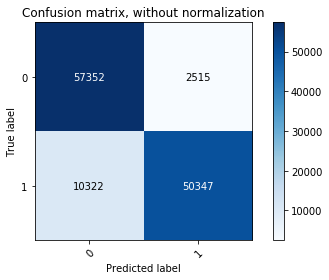

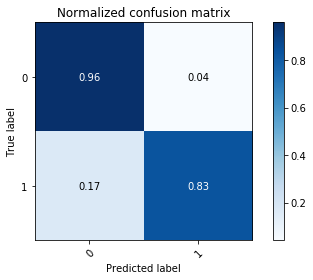

In [42]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array([0,1])
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(labels, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(labels, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [92]:
one = labels == 1
two = preds < 0.5
three = labels == 0
four = preds >= 0.5
test = preds[one & two]
test2 = preds[three & four]
x1 = np.linspace(0, 1, num=50)

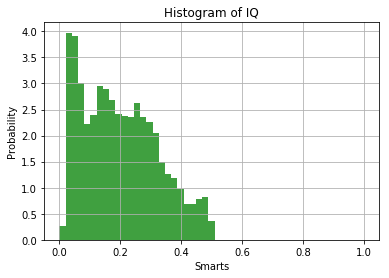

In [93]:
import numpy as np
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(test, bins=x1, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.grid(True)
plt.show()
# plt.plot(x1, test)

0.99771047


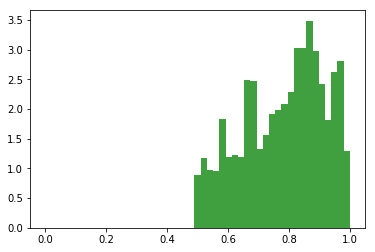

In [87]:
plt.hist(test2, bins=x1, density=True, facecolor='g', alpha=0.75)